<a href="https://colab.research.google.com/github/Neha-Pal/Machine_Learning-using-Python/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and preprocessing

In [37]:
data=pd.read_csv('/carPrice.csv')

Inspecting the first 5 rows in the dataset

In [38]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


checking the no of rows and columns

In [39]:
data.shape

(8128, 12)

getting some information about the data dataset

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [41]:
#checking the no of missing values
data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [42]:
#checking the distribution of categorical data
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


Encoding the categorical data

In [43]:
# Encoding Fuel column
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3 }},inplace=True)
# Encoding seller_type column
data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2 }},inplace=True)
# Encoding transmission column
data.replace({'transmission':{'Manual':0,'Automatic':1 }},inplace=True)

In [44]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,First Owner,16.10,1298.0,88.2,5.0


Splitting the data and target

In [45]:
x = data.drop(['name','selling_price','mileage(km/ltr/kg)','engine','max_power','seats','owner'],axis = 1)
y = data['selling_price']

In [46]:
print(x)

      year  km_driven  fuel  seller_type  transmission
0     2014     145500     1            0             0
1     2014     120000     1            0             0
2     2006     140000     0            0             0
3     2010     127000     1            0             0
4     2007     120000     0            0             0
...    ...        ...   ...          ...           ...
8123  2013     110000     0            0             0
8124  2007     119000     1            0             0
8125  2009     120000     1            0             0
8126  2013      25000     1            0             0
8127  2013      25000     1            0             0

[8128 rows x 5 columns]


Splitting inro training and test dataset

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

Model Training

# **1.Linear regression**

In [48]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [49]:
#prediction on training dataset
training_data_prediction=lin_reg_model.predict(x_train)

R-squared error

In [50]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared erroe : ",error_score)

R squared erroe :  0.46714301017204873


visualize the actual and predicted prices

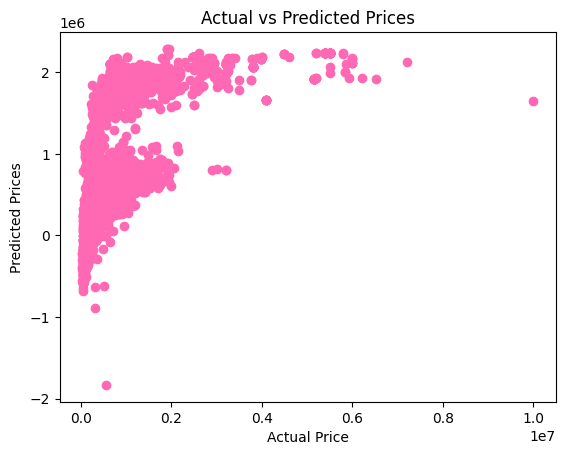

In [52]:
plt.scatter(y_train,training_data_prediction,color='hotpink')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [53]:
#prediction on test dataset
test_data_prediction=lin_reg_model.predict(x_test)

In [54]:
#R squared error
error_score_2=metrics.r2_score(y_test,test_data_prediction)
print("R squared erroe : ",error_score_2)

R squared erroe :  0.4760272402338489


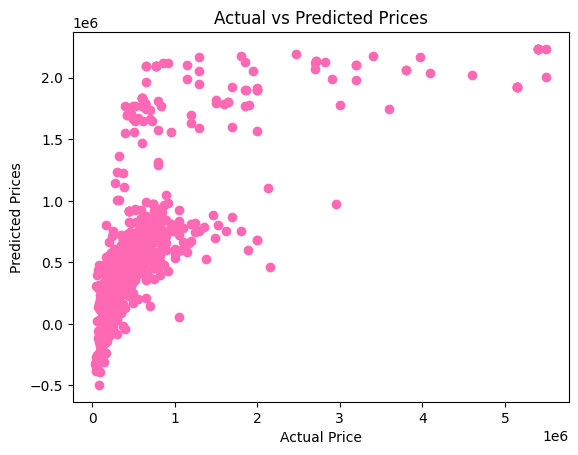

In [55]:
plt.scatter(y_test,test_data_prediction,color='hotpink')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# **2.Lasso Regression**

In [57]:
lasso_reg_model  = Lasso()
lasso_reg_model.fit(x_train,y_train)

Lasso()

Model evaluation

In [58]:
#prediction on training dataset
training_data_prediction=lin_reg_model.predict(x_train)

R squared error

In [59]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared erroe : ",error_score)

R squared erroe :  0.46714301017204873


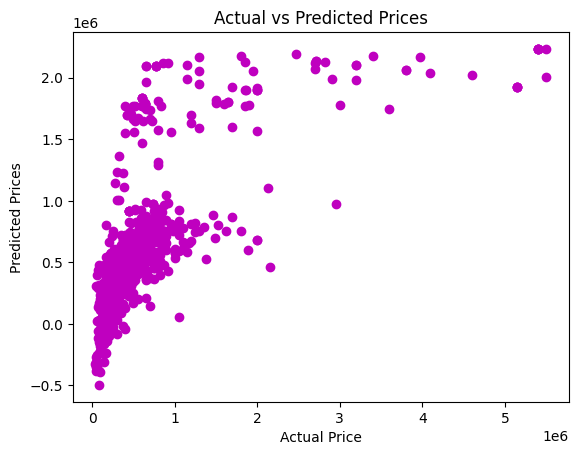

In [61]:
plt.scatter(y_test,test_data_prediction,color='m')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()